In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

class ANN:

    def __init__(self, file_path, v_neuron, w_neuron):
        self.data = pd.read_csv(file_path, header = None, sep=" ")

        self.v_neuron = v_neuron
        self.w_neuron = w_neuron

        self.matrix_y = self.y_matrix(self.data[2])

        self.matrix_x = self.input_matrix_x()
        self.matrix_x_extended = self.x_1_matrix()

        self.matrix_v = self.v_matrix()
        self.matrix_x_extended_2 = self.x_2_matrix()

        self.matrix_f = self.f_matrix()
        self.matrix_f_extended = self.f_1_matrix()

        self.matrix_w = self.w_matrix()
        self.matrix_f_extended_2 = self.f_2_matrix()

        self.matrix_g = self.g_matrix()

        self.error_history = []

    def y_matrix(self, y_data):
        matrix_y_init = np.zeros((len(self.data), 3))
        for i in range(len(self.data)):
            if y_data[i] == 0.0:
                matrix_y_init[i][0] = 1
            elif y_data[i] == 1.0:
                matrix_y_init[i][1] = 1
            elif y_data[i] == 2.0:
                matrix_y_init[i][2] = 1
        return matrix_y_init

    def input_matrix_x(self):
        return np.array([self.data[0], self.data[1]]).transpose()

    def x_1_matrix(self):
        ones = np.ones(((np.size(self.matrix_x, 0)), 1))
        return np.append(ones, self.matrix_x, axis=1)

    def v_matrix(self):
        return np.random.uniform(-1,1,(np.size(self.matrix_x_extended, 1), self.v_neuron))

    def x_2_matrix(self):
        return self.matrix_x_extended.dot(self.matrix_v)

    def f_matrix(self):
        return 1 / (1 + np.exp(-self.matrix_x_extended_2))

    def f_1_matrix(self):
        ones = np.ones((np.size(self.matrix_f, 0), 1))
        return np.append(ones, self.matrix_f, axis=1)

    def w_matrix(self):
        return np.random.rand(self.v_neuron+1, self.w_neuron)

    def f_2_matrix(self):
        return self.matrix_f_extended.dot(self.matrix_w)

    def g_matrix(self):
        return 1 / (1 + np.exp(-self.matrix_f_extended_2))

    def sum_squared_errors_calculation(self):
        squares = (self.matrix_g - self.matrix_y) ** 2
        return np.sum(squares) / 2

    def w_correction(self, alpha_w):
        w_matrix_new = np.zeros((np.size(self.matrix_w, 0), np.size(self.matrix_w, 1)))
        # w of size (k+1)xJ
        for k in range(np.size(self.matrix_w, 0) - 1):
            for j in range(np.size(self.matrix_w, 1)):
                w = self.matrix_w[k][j]
                err = 0
                for i in range(np.size(self.matrix_g, 1)):
                    g = self.matrix_g[i][j]
                    y = self.matrix_y[i][j]
                    f_ext = self.matrix_f_extended[i][k]

                    err += (g - y) * g * (1 - g) * f_ext
                w_matrix_new[k][j] = w - (alpha_w * err)
        return w_matrix_new

    def v_correction(self, alpha_v):
        v_matrix_new = np.zeros((np.size(self.matrix_v, 0), np.size(self.matrix_v, 1)))
        for n in range(np.size(self.matrix_x_extended, 1)):
            for k in range(np.size(self.matrix_v, 1)):
                v = self.matrix_v[n][k]
                err = 0
                for i in range(np.size(self.matrix_g, 0)):
                    f = self.matrix_f[i][k]
                    x_ext = self.matrix_x_extended[i][n]

                    for j in range(np.size(self.matrix_g, 1)):
                        g = self.matrix_g[i][j]
                        y = self.matrix_y[i][j]
                        w = self.matrix_w[k][j]
                        err += (g - y) * g * (1 - g) * w * f * (1 - f) * x_ext
                v_matrix_new[n][k] = v - (alpha_v * err)
        return v_matrix_new

    def FFNN(self, alpha_v=0.005, alpha_w=0.005, iter_max=5000):
        i = 0
        while i <= iter_max:
            self.matrix_w = self.w_correction(alpha_w)
            self.matrix_v = self.v_correction(alpha_v)

            self.matrix_x_extended_2 = self.x_2_matrix()

            self.matrix_f = self.f_matrix()
            self.matrix_f_extended = self.f_1_matrix()

            self.matrix_w = self.w_correction(alpha_w)
            self.matrix_f_extended_2 = self.f_2_matrix()

            self.matrix_g = self.g_matrix()

            err = self.sum_squared_errors_calculation()
            self.error_history.append(err)
            self.show_status(iter_max,i)
            i += 1
        return self.g_matrix()

    def show_error_log(self):
        plt.plot(self.error_history)
        plt.ylabel("Error")
        plt.xlabel("Itteration")
        plt.show()
    
    def show_status(self,iteration,i):
        status = np.around((i/iteration * 100 ),decimals=2) 
        print(status,"%")
        clear_output(wait=True)
        


[[0.01002662 0.99005375 0.00994565]
 [0.01002731 0.99005296 0.00994616]
 [0.01002587 0.99005459 0.0099451 ]
 [0.01002664 0.99005372 0.00994566]
 [0.01002664 0.9900537  0.00994567]
 [0.01002598 0.99005447 0.00994518]
 [0.01002626 0.99005415 0.00994538]
 [0.01002573 0.99005475 0.00994499]
 [0.01002628 0.99005413 0.0099454 ]
 [0.01002605 0.9900544  0.00994523]
 [0.01002597 0.99005448 0.00994517]
 [0.01002711 0.99005317 0.00994602]
 [0.01002777 0.99005244 0.0099465 ]
 [0.01002651 0.99005388 0.00994556]
 [0.01002721 0.99005306 0.00994609]
 [0.01002589 0.99005457 0.00994511]
 [0.01002586 0.9900546  0.00994509]
 [0.01002593 0.99005453 0.00994514]
 [0.01002632 0.99005407 0.00994543]
 [0.01002682 0.99005351 0.0099458 ]
 [0.01003387 0.99004544 0.00995108]
 [0.01003123 0.99004845 0.0099491 ]
 [0.01003588 0.99004303 0.00995264]
 [0.01003286 0.99004651 0.00995035]
 [0.0100307  0.99004903 0.00994871]
 [0.0100294  0.9900505  0.00994774]
 [0.01002989 0.99004989 0.00994813]
 [0.01003819 0.99004016 0.00

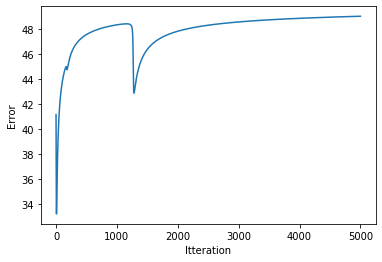

In [20]:
artificial_neural_network = ANN("data_ffnn_3classes.txt", v_neuron = 9, w_neuron = 3)

artificial_neural_network.FFNN(alpha_v = 5e-3, alpha_w = 5e-3, iter_max = 5000)
print(artificial_neural_network.matrix_g)
artificial_neural_network.show_error_log()